# Using Qiskit Terra


Qiskit Terra contains tools that **define**, **compile** and **execute** quantum circuits on arbitrary **backends**.
It allows users to manipulate qubits by using gates and even construct circuits at the level of **pulses**

In [6]:
# Import required fuctions from qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, IBMQ
from qiskit.compiler import transpile, assemble
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')
backend = provider.backends.ibmq_singapore

ibmqfactory.load_account:WARNING:2020-06-05 09:56:07,407: Credentials are already in use. The existing account in the session will be replaced.


# Transpiler Optimization levels 

optimization_level: How much optimization to perform on the circuits.
   - Higher levels generate more optimized circuits, at the expense of longer transpilation time.
            0: no optimization
            1: light optimization
            2: heavy optimization
            3: even heavier optimization
            If ``None``, level 1 will be chosen as default.




These optimization levels are provided via "preset passmanagers" in Qiskit. These are simple-to-use transpiler pipelines. You can see what each does by inspecting the documentation for those: https://github.com/Qiskit/qiskit-terra/tree/master/qiskit/transpiler/preset_passmanagers

Level 0 does no explicit optimization, it will just try to make a circuit runnable by transforming it to match a topology and basis gate set, if necessary.

Level 1, 2 and 3 do light, medium and heavy optimization, using a combination of passes, and by configuring the passes to search for better solutions. Typically more optimality comes at the cost of slower transpilation, as it spends more time searching for a good optimization.

The difference between level 2 and level 3: 
   - In level 2 the transpiler does some commutation analysis to see what gates can be collapsed. 
   - In level 3, in addition to that, it does peep-hole optimization by combining a chain of gates on the same qubits and re-synthesizing them with better cost. Also the routing stage of level 3 is more expensive than level 2 (it has a larger search space, as set by parameters of the StochasticSwap and LookaheadSwap passes).

It is important to keep in mind that these are heuristics. It is possible that, for a specific circuit, you will not see much improvement by increasing the level.


The optimization level that is chosen impacts the mapping strategies as follow : 
   - Trivial layout: Map virtual qubits to the same numbered physical qubit on the device, i.e. [0,1,2,3,4] -> [0,1,2,3,4] (default in optimization_level=0).

   - Dense layout: Find the sub-graph of the device with same number of qubits as the circuit with the greatest connectivity (default in optimization_level=1).

   - Noise adaptive layout: Uses the noise properties of the device, in concert with the circuit properties, to generate the layout with the best noise properties (default in optimization_level=2 and optimization_level=3).



In [79]:
# from Circuit Library 
# We Generate a random circuit of arbitrary size and form. 
# This function will generate a random circuit by randomly selecting gates from the set of standard gates 
from qiskit.circuit.random import random_circuit

circ = random_circuit(5, 5, measure=False)

print(circ.count_ops())

circ.draw(output='mpl')

In [80]:
# Let's transpile that circuit. We'll use simgapore as backend 
# backend: when set, the transpiler options are automatically grabbed from `backend.configuration()` 
# and `backend.properties()`. If any other option is explicitly set (e.g., ``coupling_map``), it 
# will override the backend's.

tpl_circ = transpile(circ, backend)

# count of operations
print(tpl_circ.count_ops())

# draw the circuit when transpiled
tpl_circ.draw(output='mpl', idle_wires=True)



## *Now it's your turn to play!*
<div class="alert alert-block alert-info">
<b>Note:</b>
Here's a first challenge for you:  
    
  - Generate a random circuit with 8 qubits and a depth of 10. Add the measure to the circuit
  - Tranpile that circuit using the backend 'ibmq_singapore' using different optimization_levels (0, 1, 2 and 3.
  - Draw each circuit
  - Count operations and depth of each transpiled circuits
 </div> 
</div>

In [ ]:
# Generate your random circuit 




In [ ]:
# transpile your circuit using ibmq_singapore as backend




In [ ]:
# print out the count operations 




In [ ]:
# draw the circuit 




<div class="alert alert-success">
<b>First Challenge solution</b>

In [125]:
my_random_circ = random_circuit(8, 10 , measure=True)

In [136]:
# Using the default optimization level
trans1 = transpile(my_random_circ, backend, optimization_level=1)

print(trans1.count_ops())

print('Depth:', trans1.depth())

trans1.draw(output='mpl', idle_wires=False)


In [137]:
trans2 = transpile(my_random_circ, backend, optimization_level=2)

print(trans2.count_ops())

print('Depth:', trans2.depth())

trans2.draw(output='mpl', idle_wires=False)

In [138]:
trans = transpile(my_random_circ, backend, optimization_level=3)

print(trans.count_ops())

print('Depth:', trans.depth())

trans.draw(output='mpl', idle_wires=False)

 ### If you transpile multiple times the same circuit you'll notice fluctuation in the count operations 

In [139]:
# Perform 10 transpilations of the same circuit using optimization_level 1 
for i in range(10):  
    trans1 = transpile(my_random_circ, backend, optimization_level=1)
    print(trans1.count_ops())
    print('Depth:', trans1.depth())

In [140]:
# Perform 10 transpilations of the same circuit using optimization_level 2 
for i in range(10):  
    trans2 = transpile(my_random_circ, backend, optimization_level=2)
    print(trans2.count_ops())
    print('Depth:', trans2.depth())

In [141]:
# Perform 10 transpilations of the same circuit using optimization_level 3 

for i in range(10):  
    trans3 = transpile(my_random_circ, backend, optimization_level=3)
    print(trans3.count_ops())
    print('Depth:', trans3.depth())

<div class="alert alert-block alert-info">
<b>Note:</b>
Here's a second challenge for you: Consider the circuit "qc" below  
 
  - First transpile the circuit using optimization levels 1, 2 and 3
  - Use assemble to create a Qobj of the 3 circuits. 
  - Run that list of circuit in one job using "ibmq_singapore" as backend
  - Plot the counts results for each circuit   
 </div> 
</div>

In [81]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(4,3)
qc.x(3)
qc.h(3)
qc.h(range(3))
qc.cx(range(3), 3)
qc.h(range(3))
qc.barrier(range(3))
qc.measure(range(3), range(3))
qc.draw(output='mpl')

In [ ]:
# qiskit import 
from qiskit.compiler import assemble, transpile


In [ ]:
# Set your backend to "ibmq_singapore" 


In [ ]:
# Transpile the "qc" circuit using the optimization levels 1, 2 and 3 


In [ ]:
# print the operations count for each circuit transpiled and its depth as well 


In [143]:
# Assemble the 3 circuits transpiled into one Qobj. 
# assemble function for converting a list of circuits into a qobj (pass a list of the 3 circuits)
# you must create a list containing the 3 circuits and pass the list to "assemble"
 


In [ ]:
# run the Qobj in one job using your backend 


In [ ]:
# get the count results of the job 


In [ ]:
# from the count results get the count for each circuit 


In [ ]:
# plot the counts for each circuit in one plot_histogram 


<div class="alert alert-success">
<b>Second Challenge solution</b>

In [73]:
backend = provider.backends.ibmq_cambridge
trans1 = transpile(qc, backend,  optimization_level=1)
print(trans1.count_ops())
print('Depth:', trans1.depth())
trans2 = transpile(qc, backend,  optimization_level=2)
print(trans2.count_ops())
print('Depth:', trans2.depth())
trans3 = transpile(qc, backend,  optimization_level=3)
print(trans3.count_ops())
print('Depth:', trans3.depth())

OrderedDict([('cx', 12), ('u2', 7), ('measure', 3), ('barrier', 1)])
Depth: 12
OrderedDict([('u2', 7), ('cx', 3), ('measure', 3), ('barrier', 1)])
Depth: 6
OrderedDict([('u2', 7), ('cx', 3), ('measure', 3), ('barrier', 1)])
Depth: 6


In [74]:
from qiskit.compiler import assemble

# create a list of circuits 
circuit_list = []  # This will be what we send with our job

# append each circuit to the list
circuit_list.append(trans1)
circuit_list.append(trans2)
circuit_list.append(trans3)


# create the Qobj from the circuit list  
qobj = assemble(circuit_list, shots=1024)

In [75]:
# run the job 
job = backend.run(qobj)

In [76]:
#get the results for the 3 circuits 
results = job.result()

In [77]:
# for each circuit get the counts 
trans1_counts = results.get_counts()[0]
trans2_counts = results.get_counts()[1]
trans3_counts = results.get_counts()[2]

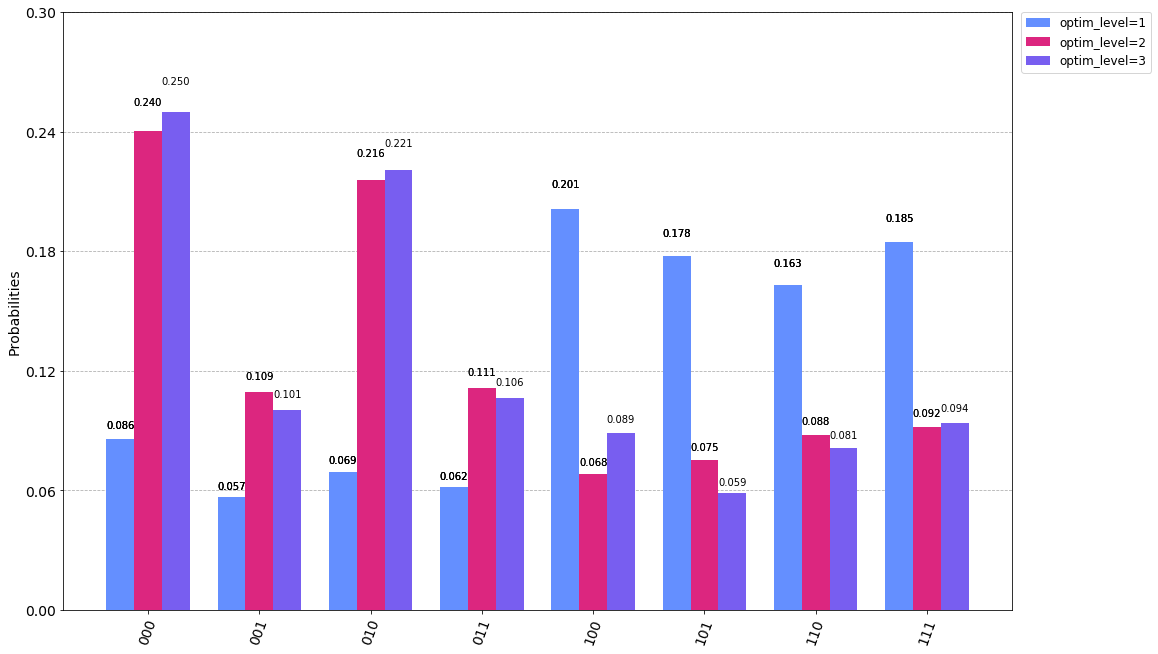

In [78]:
# plotting 
from qiskit.visualization import plot_histogram
plot_histogram([trans1_counts, trans2_counts, trans3_counts],
               figsize=(17,11),
               legend=['optim_level=1', 'optim_level=2', 'optim_level=3'])

# Pass Manager 

In [89]:
from qiskit import Aer
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import BasicSwap
from qiskit.compiler import transpile
from qiskit.transpiler import CouplingMap

coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]


simulator = Aer.get_backend('qasm_simulator')


coupling_map = CouplingMap(couplinglist=coupling)


pm = PassManager()

pm.append([BasicSwap(coupling_map=coupling_map)])

# transpiled_circuit = pm.run(tpl_circuit)
tpl_circuit = pm.run(qc)

tpl_circuit.draw(output='mpl')



In [90]:
realdevice = provider.backends.ibmq_16_melbourne
tpl_realdevice = transpile(tpl_circuit, backend = realdevice, optimization_level=2)
tpl_realdevice.draw(output='mpl', idle_wires=False)

<div class="alert alert-block alert-info">
<b>Note:</b>
Here's a question for you: Consider the circuit tpl_realdevice 
 
  - How do you explain the difference in the number of CNOT gates between the circuit transpiled on the simulator and the circuit transpiled on the real backend 'ibmq_16_melbourne' 
 </div> 
</div>

In [317]:
help(BasicSwap)

Help on class BasicSwap in module qiskit.transpiler.passes.routing.basic_swap:

class BasicSwap(qiskit.transpiler.basepasses.TransformationPass)
 |  BasicSwap(*args, **kwargs)
 |  
 |  Map (with minimum effort) a DAGCircuit onto a `coupling_map` adding swap gates.
 |  
 |  The basic mapper is a minimum effort to insert swap gates to map the DAG onto
 |  a coupling map. When a cx is not in the coupling map possibilities, it inserts
 |  one or more swaps in front to make it compatible.
 |  
 |  Method resolution order:
 |      BasicSwap
 |      qiskit.transpiler.basepasses.TransformationPass
 |      qiskit.transpiler.basepasses.BasePass
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, coupling_map)
 |      BasicSwap initializer.
 |      
 |      Args:
 |          coupling_map (CouplingMap): Directed graph represented a coupling map.
 |  
 |  run(self, dag)
 |      Run the BasicSwap pass on `dag`.
 |      
 |      Args:
 |          dag (DAGCircuit): DAG to ma

### A SWAP gate is not a native gate on the IBM Q devices, and must be decomposed into three CNOT gates:

As a product of three CNOT gates, SWAP gates are expensive operations to perform on a noisy quantum devices. However, such operations are usually necessary for embedding a circuit into the limited entangling gate connectivities of actual devices. Thus, minimizing the number of SWAP gates in a circuit is a primary goal in the transpilation process.

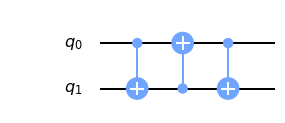

In [325]:
swap_circ = QuantumCircuit(2)
swap_circ.swap(0, 1)
swap_circ.decompose().draw(output='mpl')